In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
Nifty_data=pd.read_csv("/home/abhijeet/Summer/NIFTY50.csv",parse_dates=['Date'],index_col=['Date'])

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

In [5]:
train=Nifty_data['Close'].iloc[:1750]
test=Nifty_data['Close'].iloc[1751:]

In [6]:
print(train.tail())

Date
2017-04-10    9181.45
2017-04-11    9237.00
2017-04-12    9203.45
2017-04-13    9150.80
2017-04-17    9139.30
Name: Close, dtype: float64


In [7]:
print(test.head())

Date
2017-04-19    9103.50
2017-04-20    9136.40
2017-04-21    9119.40
2017-04-24    9217.95
2017-04-25    9306.60
Name: Close, dtype: float64


In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

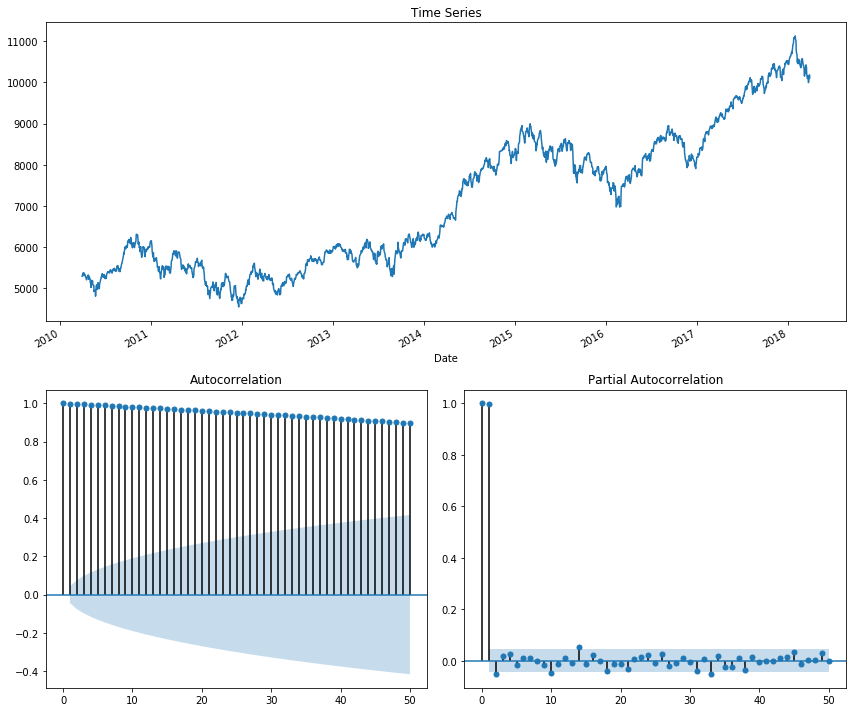

In [10]:
# plotting data
plotds(Nifty_data['Close'], nlag=50)
plt.show()

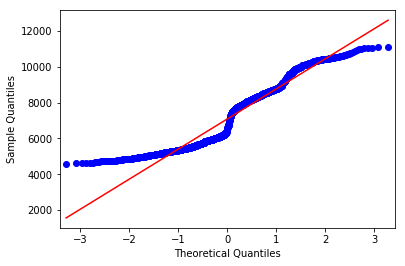

In [11]:
#plotting QQ plot and probability plot
sm.qqplot(Nifty_data['Close'], line='s')
plt.show()

In [39]:
import sklearn.metrics

In [69]:
# Optimize ARIMA parameters
aicVal=[]
sco=[]
for d in range(0,3):
    for ari in range(0,3):
        for maj in range(0,3):
            try:
                arima_obj1 = ARIMA(train.tolist(), order=(ari,d,maj))
                arima_obj1_fit=arima_obj1.fit()
                pred=np.append([0,0],arima_obj1_fit.fittedvalues.tolist())
                score=sklearn.metrics.r2_score(test,pred[:len(test)])
                aicVal.append([ari, d, maj, arima_obj1_fit.aic])
                sco.append(score)
            except:
                pass

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [67]:
aicVal

[[0, 0, 0, 30193.686701654115],
 [0, 0, 1, 27880.42141807286],
 [1, 0, 0, 19668.039960435686],
 [1, 0, 1, 19660.43662157644],
 [1, 0, 2, 19661.321858367395],
 [2, 0, 0, 19660.899802102394],
 [2, 0, 1, 19661.088185162327],
 [2, 0, 2, 19662.871187841836],
 [0, 1, 0, 19647.011003891184],
 [0, 1, 1, 19639.733735864007],
 [0, 1, 2, 19640.46901475522],
 [1, 1, 0, 19640.26300762625],
 [1, 1, 1, 19640.26170341253],
 [1, 1, 2, 19642.090111680467],
 [2, 1, 0, 19640.595898521846],
 [2, 1, 1, 19642.109085610107],
 [2, 1, 2, 19644.05015158085],
 [0, 2, 0, 20719.646353071028],
 [0, 2, 1, 19645.798277780905],
 [0, 2, 2, 19638.444442414188],
 [1, 2, 0, 20330.09770937894],
 [1, 2, 1, 19638.972492327615],
 [1, 2, 2, 19638.998002516622],
 [2, 2, 0, 20127.092017294315],
 [2, 2, 1, 19639.339305852678],
 [2, 2, 2, 19642.311592589445]]

In [70]:
sco

[-66.12704292990492,
 -86.8410706832337,
 -111.83500327939676,
 -111.87601368852245,
 -111.8768495362664,
 -111.83676256079124,
 -111.87739391066805,
 -111.87670768309573,
 -552.0359766145367,
 -552.0453449047247,
 -552.0421544737993,
 -552.0454385012157,
 -552.0436574929025,
 -552.0448530433856,
 -552.0415997405527,
 -552.0449579123972,
 -552.044557976591,
 -552.2811507930213,
 -552.1665095427417,
 -552.1629470472993,
 -552.2751791752017,
 -552.1630602519673,
 -552.1618423182357,
 -552.2675902505307,
 -552.1636920720871,
 -552.1629695590988]